## EXPLORATORY DATA ANALYSIS


### Roles to explore:

In [1]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
# dataset = load_dataset('lukebarousse/data_jobs')
# df = dataset['train'].to_pandas()

# Loading Data from CSV
df = pd.read_csv("F:\ALMACENAMIENTO\DATA ANALITYCS\carpeta_extra\job_postings_flat.csv")

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Naomi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter for US Data Analyst Roles

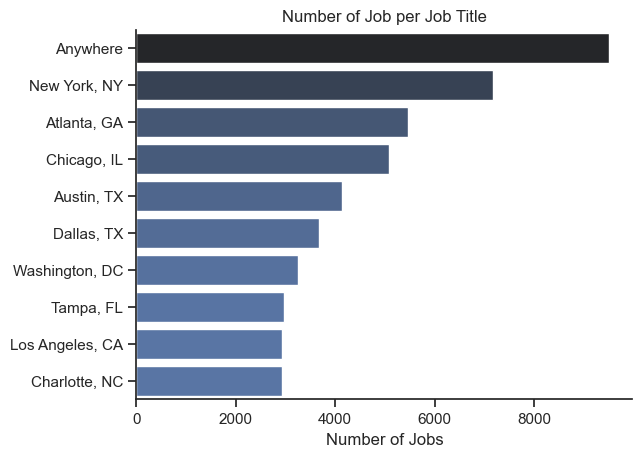

In [3]:
# Calculate histogram of salary year avg for Data Analyst in USA: 

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_plot= df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Job per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

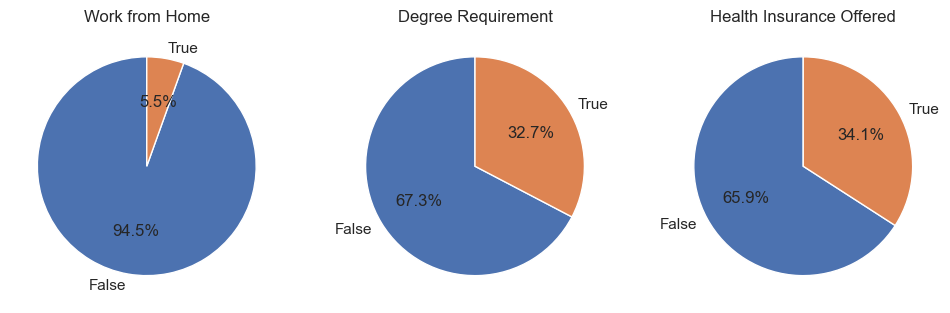

In [4]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i,(column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),labels=['False','True'],startangle=90,autopct='%1.1f%%')
    ax[i].set_title(title)

plt.show()

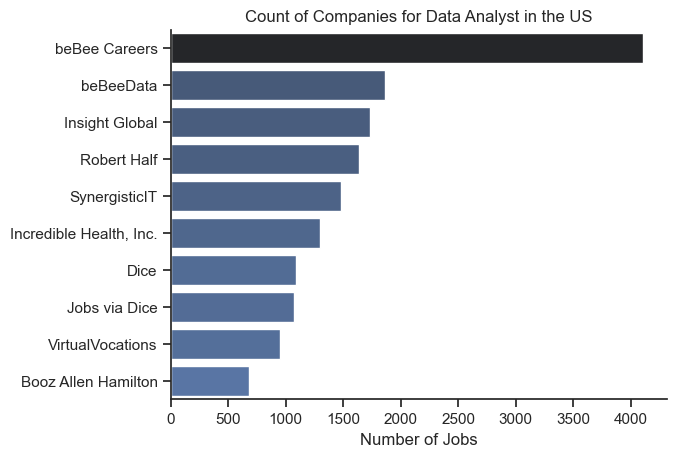

In [5]:
# Calculate histogram of salary year avg for Data Analyst in USA: 

df_plot= df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count', palette='dark:b_r',legend=False)

sns.despine()
plt.title('Count of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()